### Working with data

In [3]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv("data/train.csv")

In [5]:
data

,id,time,x,y
0,1,0,800,0
1,1,780,780,0
2,1,1572,792,0
3,1,2392,820,0
4,1,3196,804,0
...,...,...,...,...
60482,275,115360,552,0
60483,275,115912,552,0
60484,275,116464,552,0
60485,275,117020,556,0


In [6]:
data.describe()

,id,time,x,y
count,60487.000000,6.048700e+04,60487.000000,60487.000000
mean,136.440607,2.503140e+05,617.766677,0.148148
std,74.537697,3.457017e+05,287.553536,0.355249
min,1.000000,0.000000e+00,12.000000,0.000000
25%,87.000000,4.122800e+04,548.000000,0.000000
50%,137.000000,1.014480e+05,624.000000,0.000000
75%,197.000000,3.032860e+05,732.000000,0.000000
max,275.000000,1.868576e+06,40900.000000,1.000000


In [7]:
# Trying to datamine statisctics
data[data.y==0].describe()

,id,time,x,y
count,51526.000000,5.152600e+04,51526.000000,51526.0
mean,137.058048,2.799139e+05,612.176163,0.0
std,73.596676,3.607936e+05,308.173044,0.0
min,1.000000,0.000000e+00,12.000000,0.0
25%,101.000000,4.957000e+04,540.000000,0.0
50%,138.000000,1.242860e+05,624.000000,0.0
75%,195.000000,3.628900e+05,740.000000,0.0
max,275.000000,1.868576e+06,40900.000000,0.0


In [8]:
data[data.y==1].describe()

,id,time,x,y
count,8961.000000,8.961000e+03,8961.000000,8961.0
mean,132.890302,8.011406e+04,649.912287,1.0
std,79.644858,1.555596e+05,104.142159,0.0
min,1.000000,0.000000e+00,464.000000,1.0
25%,64.000000,2.088400e+04,576.000000,1.0
50%,125.000000,4.236800e+04,628.000000,1.0
75%,203.000000,8.203600e+04,692.000000,1.0
max,275.000000,1.861928e+06,1024.000000,1.0


In [10]:
def get_ids(data, column_id='id'):
    return list(data[column_id].unique())

In [11]:
print(get_ids(data))

[1, 2, 3, 4, 5, 6, 7, 10, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 27, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 82, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 96, 97, 99, 100, 101, 102, 103, 104, 107, 108, 109, 110, 111, 112, 113, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 136, 137, 138, 139, 140, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 155, 156, 158, 159, 160, 161, 162, 163, 164, 167, 169, 170, 172, 173, 174, 177, 178, 179, 180, 182, 185, 186, 187, 188, 189, 190, 191, 193, 194, 195, 196, 197, 199, 201, 202, 203, 204, 205, 206, 207, 208, 209, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 244, 245, 246, 247, 250, 251, 252, 253, 254, 257, 258, 259, 260, 261, 2

In [12]:
def get_series_from_data(data, idx, column_id='id', time_axis='time'):
    return data[data[column_id]==idx].sort_values(by=time_axis).reset_index().drop("index", axis=1)

def get_simple_data(series_from_data):
    id = series_from_data['id']
    target = series_from_data['y'].to_numpy()
    assert np.all(id == list(id)[0])
    id = id[0]
    #print(target[target != list(target)[0]], list(target)[0])
    #assert np.all(target == list(target)[0])
    time = series_from_data['time'].to_numpy()
    ampl = series_from_data['x'].to_numpy()
    
    return {'id': id, 'time':time, 'ampl':ampl, 'target': target}
    

In [13]:
get_series_from_data(data, 12).head(10)

,id,time,x,y
0,12,0,636,0
1,12,628,628,0
2,12,1248,620,0
3,12,1880,632,0
4,12,2512,632,0
5,12,3148,636,1
6,12,3776,628,1
7,12,4400,624,1
8,12,5028,628,1
9,12,5664,636,1


In [14]:
get_simple_data(get_series_from_data(data, 12))

{'id': 12,
 'time': array([    0,   628,  1248,  1880,  2512,  3148,  3776,  4400,  5028,
         5664,  6336,  6912,  7536,  8168,  8800,  9424, 10056, 10684,
        11328, 11968, 12600, 13236, 13864, 14500, 15132, 15756, 16380,
        17012, 17644, 18900, 19532, 20164, 20800, 21428, 22056, 22736,
        23320, 23944, 24568, 25248, 25824, 26456, 27084, 27712, 28344,
        28972, 29252, 29612, 30248, 30876, 31252, 31556, 32140, 32252,
        32772, 33252, 33400, 34024, 34256, 34640, 35908, 36252, 36536,
        37216, 37796, 38432, 39064, 40256, 40368, 40956, 41584, 42208,
        42832, 43456, 44088, 44708, 46260, 46584, 47208, 47836, 48464,
        49100, 49260, 49724, 50356, 50984, 51260, 51608, 52252, 52876,
        53260, 53512, 54264, 54788, 55420, 56052, 56268, 56680, 57944,
        59192, 59820, 60448, 61068, 61692, 62368, 62952, 63268, 63584,
        64212, 64840, 65268, 65476, 66164, 66744, 67268, 67380, 68016,
        68652, 69932, 70272, 70568, 71200, 71832, 72468, 7

In [15]:
import matplotlib.pyplot as plt

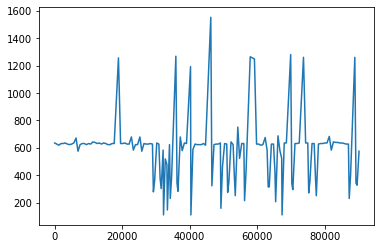

In [42]:
graph_data = get_simple_data(get_series_from_data(data, 12))
plt.plot(graph_data['time'], graph_data['ampl'])

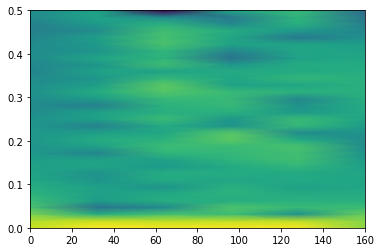

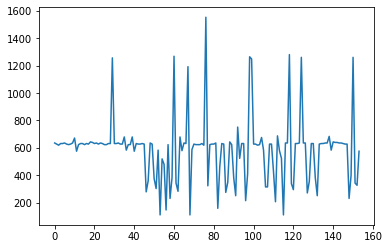

In [17]:
graph_data = get_simple_data(get_series_from_data(data, 12))
plt.plot(graph_data['ampl'])

In [ ]:
import 

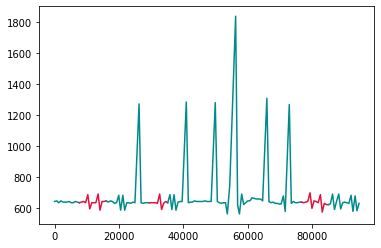

In [20]:
graph_data = get_simple_data(get_series_from_data(data, 30))
labels = graph_data['target']
subdata = []
cur_label = labels[0]
start_id = 0
for i,label in enumerate(labels):
    if label != cur_label:
        new_data = {'time': graph_data['time'][start_id:i+1], 'ampl': graph_data['ampl'][start_id:i+1], 'target': graph_data['target'][start_id:i+1]}
        cur_label = label
        start_id = i
        subdata.append(new_data)
subdata.append({'time': graph_data['time'][start_id:len(labels)], 'ampl': graph_data['ampl'][start_id:len(labels)], 'target': graph_data['target'][start_id:len(labels)]})

        
for sdata in subdata:
    color = ['#008B8B', '#DC143C'][sdata['target'][0]]
    plt.plot(sdata['time'], sdata['ampl'], color=color)

In [30]:
from scipy.interpolate import CubicSpline

interpolator = CubicSpline(graph_data['time'],graph_data['ampl'])
interpolator_target = CubicSpline(graph_data['time'],graph_data['target'])

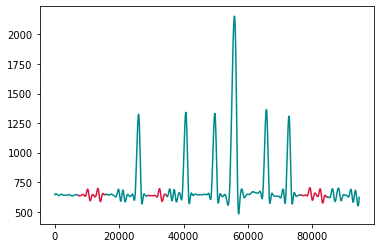

In [102]:
graph_data = get_simple_data(get_series_from_data(data, 30))
new_x = np.arange(0, max(graph_data['time']), 624 //8)
#new_x = np.sort(np.random.randint(0, max(graph_data['time']), len(graph_data['time'])))
new_ampl = interpolator(new_x)
new_y = (interpolator_target(new_x) > 0.5).astype(np.int)

graph_data = {'time': new_x,  'ampl': new_ampl, 'target': new_y}

labels = graph_data['target']
subdata = []
cur_label = labels[0]
start_id = 0
for i,label in enumerate(labels):
    if label != cur_label:
        new_data = {'time': graph_data['time'][start_id:i+1], 'ampl': graph_data['ampl'][start_id:i+1], 'target': graph_data['target'][start_id:i+1]}
        cur_label = label
        start_id = i
        subdata.append(new_data)
subdata.append({'time': graph_data['time'][start_id:len(labels)], 'ampl': graph_data['ampl'][start_id:len(labels)], 'target': graph_data['target'][start_id:len(labels)]})

        
for sdata in subdata:
    color = ['#008B8B', '#DC143C'][sdata['target'][0]]
    plt.plot(sdata['time'], sdata['ampl'], color=color)



In [103]:
print(graph_data['ampl'].shape)

(1213,)


6.782083936682101 -14.639407143515689


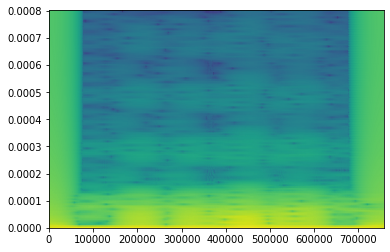

In [109]:
from scipy import signal
f, t, Zxx = signal.stft(graph_data['ampl'], 1/624, nperseg=256, noverlap=256-1)
print(np.log(np.abs(Zxx)).max(), np.log(np.abs(Zxx)).min())
plt.pcolormesh(t, f, np.log(np.abs(Zxx)), shading='gouraud')
plt.show()

In [108]:
np.abs(Zxx).shape

(17, 1214)

In [30]:
time_diffs = []
current_time = None
for index, row in data.iterrows():
    if current_time is None or current_time > row.time :
        current_time = row.time
        continue
    time_diffs.append(row.time - current_time)
    current_time = row.time
    

In [73]:
np.median(time_diffs)

624.0

In [32]:
min(time_diffs)

12

In [34]:
n = 188
timestep = 0.1
freq = np.fft.fftfreq(n, d=timestep)
freq

array([ 0.        ,  0.05319149,  0.10638298,  0.15957447,  0.21276596,
        0.26595745,  0.31914894,  0.37234043,  0.42553191,  0.4787234 ,
        0.53191489,  0.58510638,  0.63829787,  0.69148936,  0.74468085,
        0.79787234,  0.85106383,  0.90425532,  0.95744681,  1.0106383 ,
        1.06382979,  1.11702128,  1.17021277,  1.22340426,  1.27659574,
        1.32978723,  1.38297872,  1.43617021,  1.4893617 ,  1.54255319,
        1.59574468,  1.64893617,  1.70212766,  1.75531915,  1.80851064,
        1.86170213,  1.91489362,  1.96808511,  2.0212766 ,  2.07446809,
        2.12765957,  2.18085106,  2.23404255,  2.28723404,  2.34042553,
        2.39361702,  2.44680851,  2.5       ,  2.55319149,  2.60638298,
        2.65957447,  2.71276596,  2.76595745,  2.81914894,  2.87234043,
        2.92553191,  2.9787234 ,  3.03191489,  3.08510638,  3.13829787,
        3.19148936,  3.24468085,  3.29787234,  3.35106383,  3.40425532,
        3.45744681,  3.5106383 ,  3.56382979,  3.61702128,  3.67

In [46]:
n = 512
timestep = 1/1024
freq = np.fft.fftfreq(n, d=timestep)
max(freq)

510.0

In [41]:
!pip install scipy

  Using cached scipy-1.5.4-cp36-cp36m-manylinux1_x86_64.whl (25.9 MB)


In [47]:
mapping = {"0": 1, "1": 2, "2": 3, "3": 4, "4": 5, "5": 6, "6": 7, "7": 10, "8": 12, "9": 13, "10": 14, "11": 15, "12": 16, "13": 17, "14": 19, "15": 20, "16": 21, "17": 22, "18": 23, "19": 24, "20": 25, "21": 27, "22": 29, "23": 30, "24": 31, "25": 32, "26": 33, "27": 34, "28": 35, "29": 36, "30": 38, "31": 39, "32": 40, "33": 41, "34": 42, "35": 43, "36": 44, "37": 45, "38": 46, "39": 47, "40": 48, "41": 49, "42": 51, "43": 52, "44": 53, "45": 54, "46": 55, "47": 57, "48": 58, "49": 59, "50": 60, "51": 61, "52": 62, "53": 63, "54": 64, "55": 65, "56": 66, "57": 67, "58": 68, "59": 69, "60": 70, "61": 71, "62": 72, "63": 73, "64": 74, "65": 75, "66": 76, "67": 77, "68": 78, "69": 79, "70": 80, "71": 82, "72": 84, "73": 85, "74": 86, "75": 87, "76": 88, "77": 89, "78": 90, "79": 91, "80": 92, "81": 93, "82": 96, "83": 97, "84": 99, "85": 100, "86": 101, "87": 102, "88": 103, "89": 104, "90": 107, "91": 108, "92": 109, "93": 110, "94": 111, "95": 112, "96": 113, "97": 115, "98": 116, "99": 117, "100": 118, "101": 119, "102": 120, "103": 121, "104": 122, "105": 123, "106": 124, "107": 125, "108": 126, "109": 127, "110": 128, "111": 129, "112": 130, "113": 131, "114": 132, "115": 133, "116": 134, "117": 136, "118": 137, "119": 138, "120": 139, "121": 140, "122": 143, "123": 144, "124": 145, "125": 146, "126": 147, "127": 148, "128": 149, "129": 150, "130": 151, "131": 152, "132": 153, "133": 155, "134": 156, "135": 158, "136": 159, "137": 160, "138": 161, "139": 162, "140": 163, "141": 164, "142": 167, "143": 169, "144": 170, "145": 172, "146": 173, "147": 174, "148": 177, "149": 178, "150": 179, "151": 180, "152": 182, "153": 185, "154": 186, "155": 187, "156": 188, "157": 189, "158": 190, "159": 191, "160": 193, "161": 194, "162": 195, "163": 196, "164": 197, "165": 199, "166": 201, "167": 202, "168": 203, "169": 204, "170": 205, "171": 206, "172": 207, "173": 208, "174": 209, "175": 213, "176": 214, "177": 215, "178": 216, "179": 217, "180": 218, "181": 219, "182": 220, "183": 221, "184": 222, "185": 223, "186": 224, "187": 225, "188": 226, "189": 228, "190": 229, "191": 230, "192": 231, "193": 232, "194": 233, "195": 234, "196": 235, "197": 236, "198": 237, "199": 238, "200": 239, "201": 240, "202": 241, "203": 242, "204": 244, "205": 245, "206": 246, "207": 247, "208": 250, "209": 251, "210": 252, "211": 253, "212": 254, "213": 257, "214": 258, "215": 259, "216": 260, "217": 261, "218": 262, "219": 263, "220": 264, "221": 265, "222": 266, "223": 268, "224": 270, "225": 271, "226": 272, "227": 273, "228": 275}

In [48]:
mapping = {int(k):v for k,v in mapping.items()}

In [51]:
train_idx = [mapping[id] for id in np.load('/home/malchul/work/CadrioSpike/data/train.npy')]
val_idx = [mapping[id] for id in np.load('/home/malchul/work/CadrioSpike/data/val.npy')]

In [52]:
train_csv = data[data['id'].isin(train_idx)]
val_csv = data[data['id'].isin(train_idx)]

In [55]:
train_csv.to_csv('train_split.csv')
val_csv.to_csv('val_split.csv')

In [56]:
val_csv

,id,time,x,y
0,1,0,800,0
1,1,780,780,0
2,1,1572,792,0
3,1,2392,820,0
4,1,3196,804,0
...,...,...,...,...
60482,275,115360,552,0
60483,275,115912,552,0
60484,275,116464,552,0
60485,275,117020,556,0


In [78]:
TIME_NORMALIZER = 624.0
def get_angle(data):
    data['time'] = data['time'] / TIME_NORMALIZER
    p1_x = data['time'][:-2]
    p2_x = data['time'][1:-1]
    p3_x = data['time'][2:]

    p1_y = data['ampl'][:-2]
    p2_y = data['ampl'][1:-1]
    p3_y = data['ampl'][2:]
    result = np.arctan2(p3_y - p1_y, p3_x - p1_x) - \
                np.arctan2(p2_y - p1_y, p2_x - p1_x)
    result = np.concatenate([np.array([0.0]), result, np.array([0.0])], axis=0)
    data['angle'] = result
    return data

In [96]:
simple_data = get_simple_data(get_series_from_data(data, 3))

[1 0 0 2 0 2 0 2 0 0 2 2 0 2 2 0 0 2 0 2 2 0 2 2 0 2 0 2 2 0 2 0 0 2 0 0 2
 0 2 0 2 0 2 0 2 2 0 2 0 0 2 0 0 2 0 2 0 2 2 0 0 2 0 0 2 0 2 2 0 2 0 0 2 0
 0 2 0 2 0 0 2 0 2 2 2 0 2 2 0 2 0 0 2 0 2 0 2 0 0 2 2 0 2 0 1]


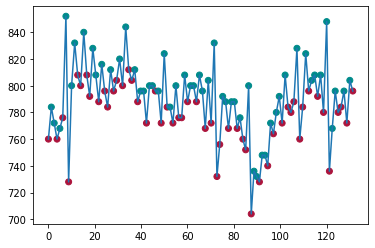

In [97]:
get_angle(simple_data)

plt.plot(simple_data['time'], simple_data['ampl'])
point_color = ['#008B8B', '#AC143C', '#AC143C']
angle2color = (np.sign(simple_data['angle']) + 1). astype(int)
print(angle2color)
colors = [point_color[p] for p in angle2color]
plt.scatter(simple_data['time'], simple_data['ampl'], c=colors)